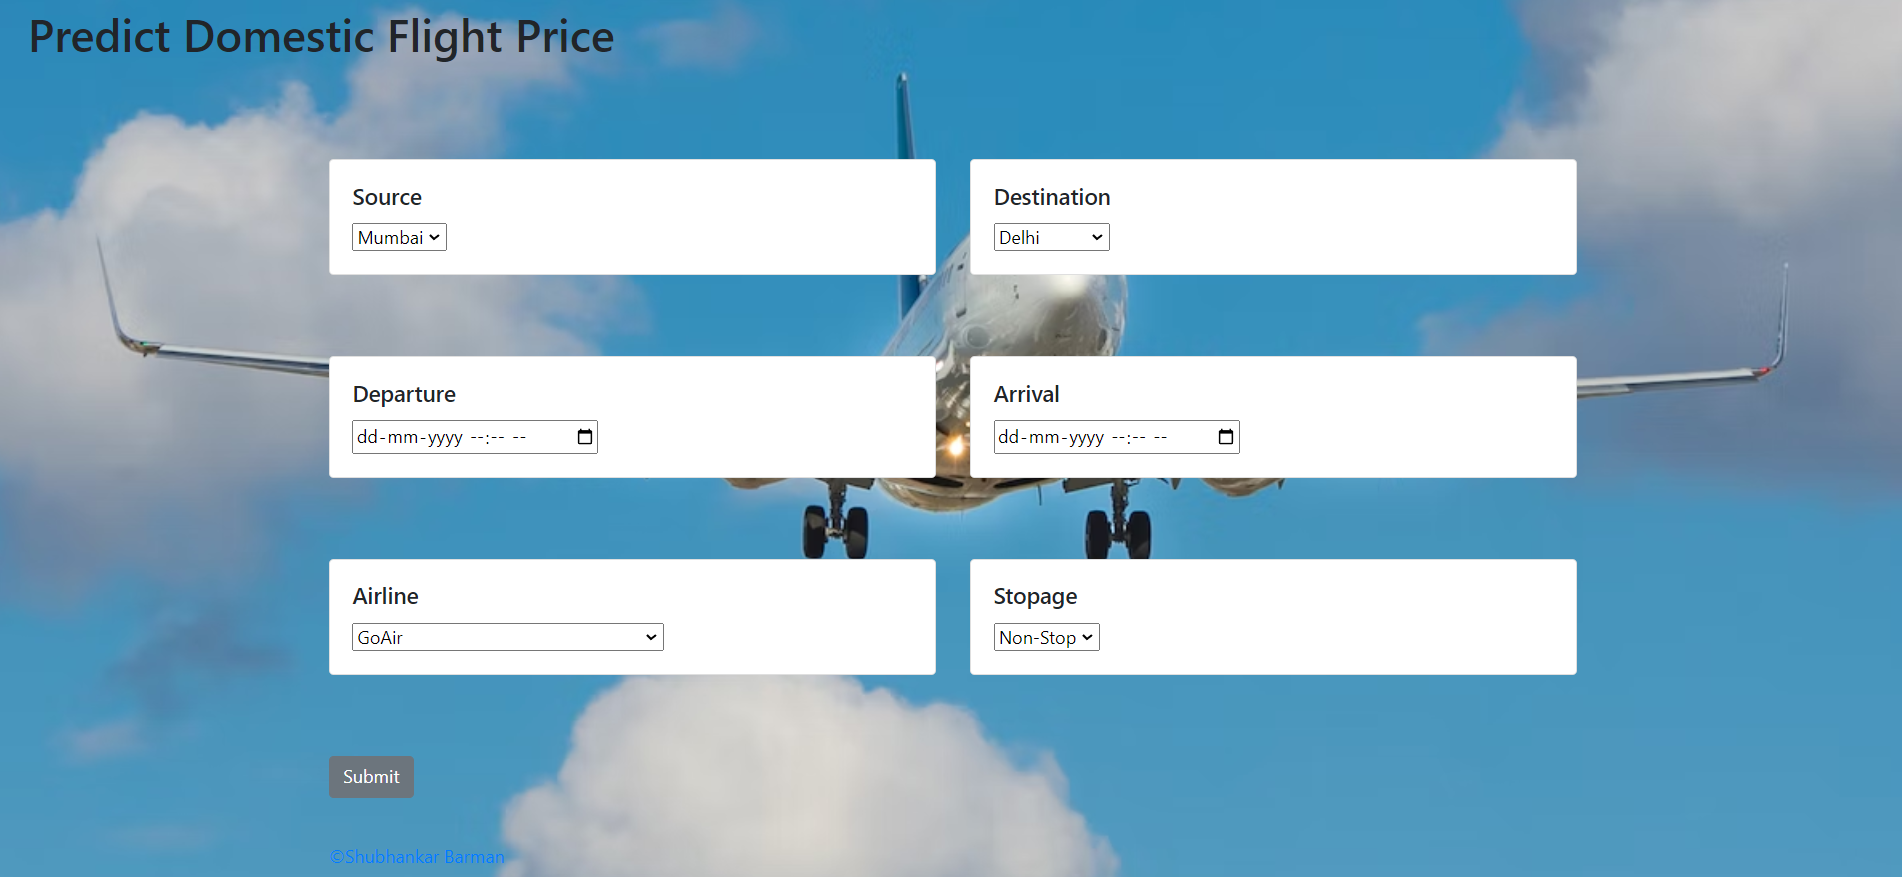

In [1]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b31977d23651640f0ab8deb195d98fc4741ccb49df5ef4afbcc5951126219218
  Stored in directory: c:\users\shubh\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [2]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=9d85508bb1cdcef46349b38533734a9003d110df70c4dcfc07ddda3e230b74de
  Stored in directory: c:\users\shubh\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## **Automated EDA**

In [5]:
!pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=ed7ab2c975abec947dc23645a207f237e51802bf5bbbdb57c5ea24cc7e42a3ef
  Stored in directory: c:\users\shubh\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [6]:
import pandas_profiling as pf

In [7]:
 pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Manual EDA**

In [8]:
df.shape

(10683, 11)

In [9]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Remove the NaN values from the dataset
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<br>
<br>

## **Feature Engineering**

Let's convert **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [12]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


<br>

### Date_of_journey

In [13]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Pro

In [14]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [15]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

<br>
Let's do the same for the other relative columns
<br>

## Resolving Dep_time

In [16]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

<br>

## Resolving  Arrival_time

In [18]:

df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


<br>

## Resolve Duration Time

In [24]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [25]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

## Drop Additional_Info,Route

In [45]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)


In [46]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,00


<br>

In [28]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

## Count of Airlines

In [29]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<br>

## Airline vs Price

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(close=None, block=None)>

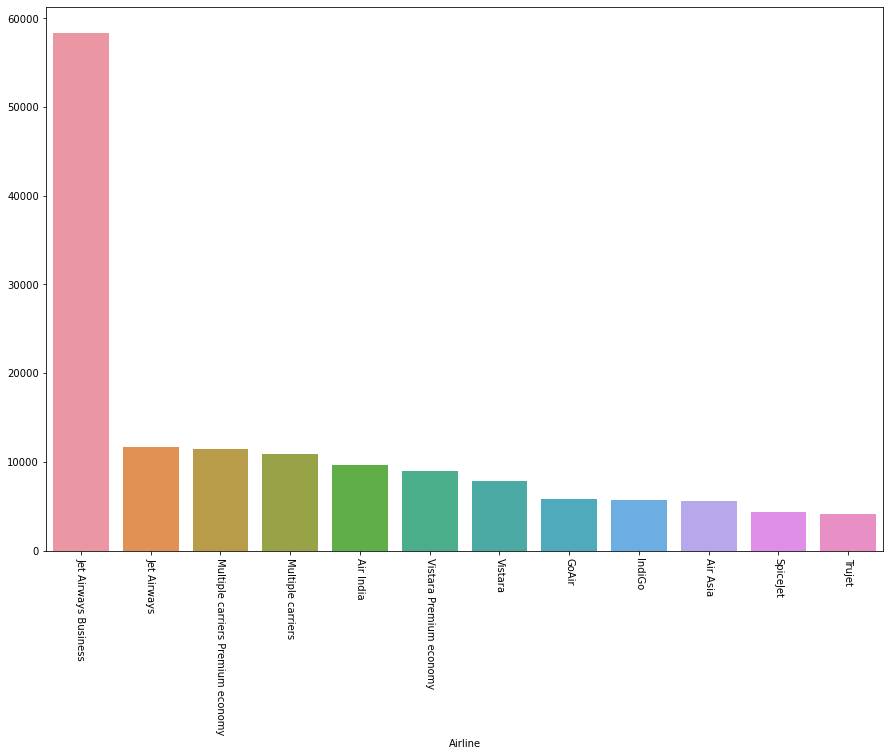

In [31]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show

**Jet Airways Business has the highest price with Trujet having the lowest**

<function matplotlib.pyplot.show(close=None, block=None)>

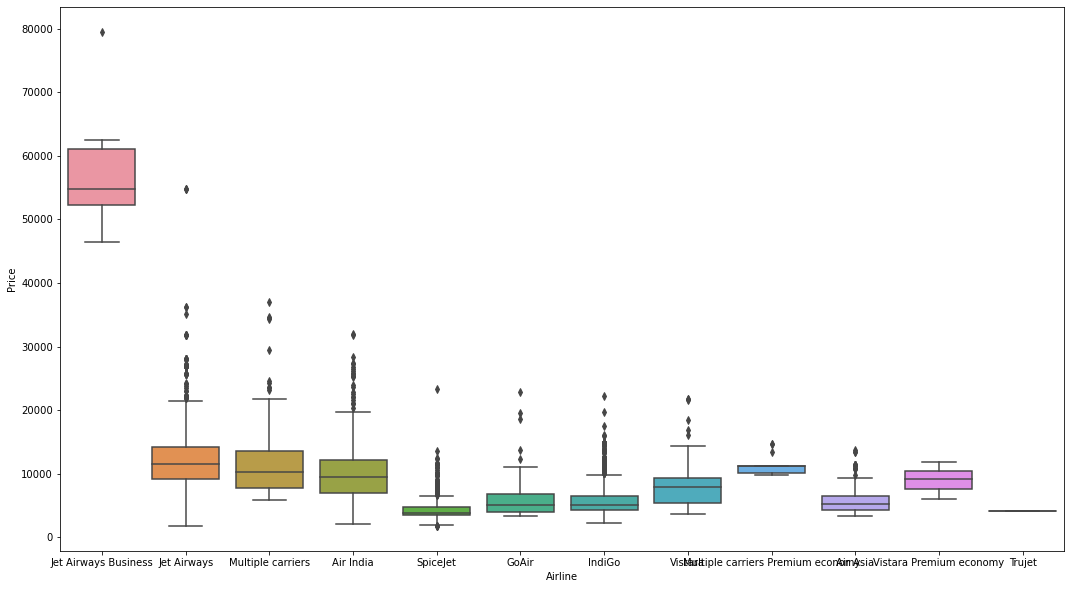

In [32]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

<br>

## Price based on number of stops

In [33]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

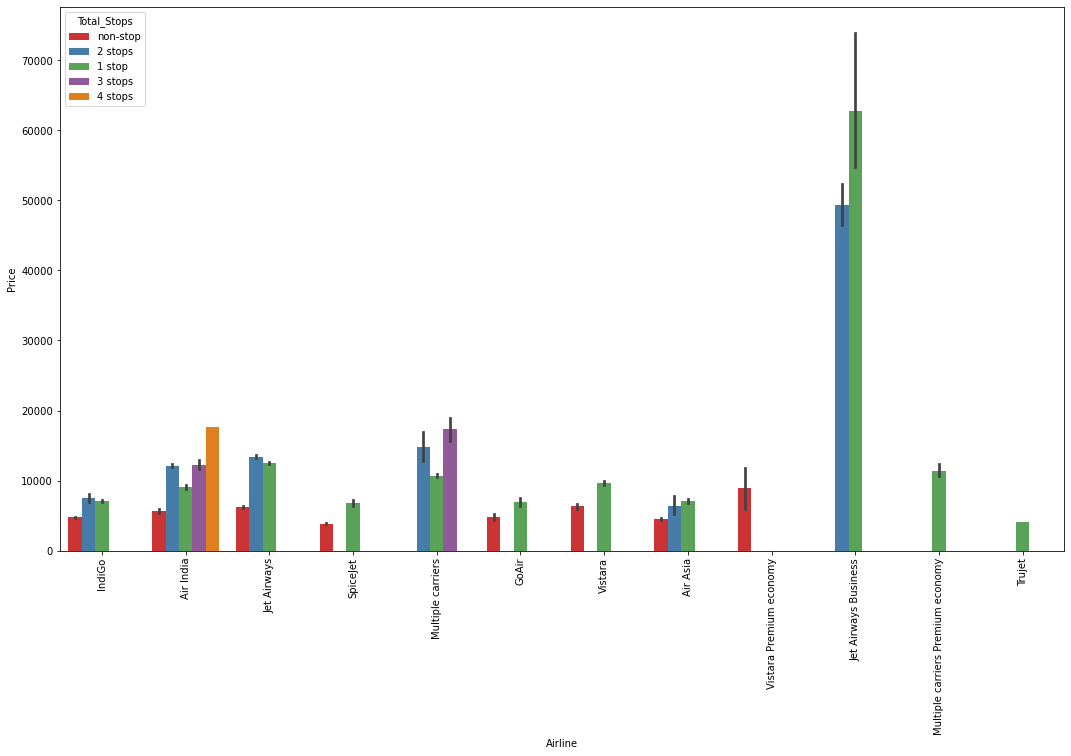

In [34]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stpos Jet Airways Business is having the highest price**

<br>

In [35]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<br>

## Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

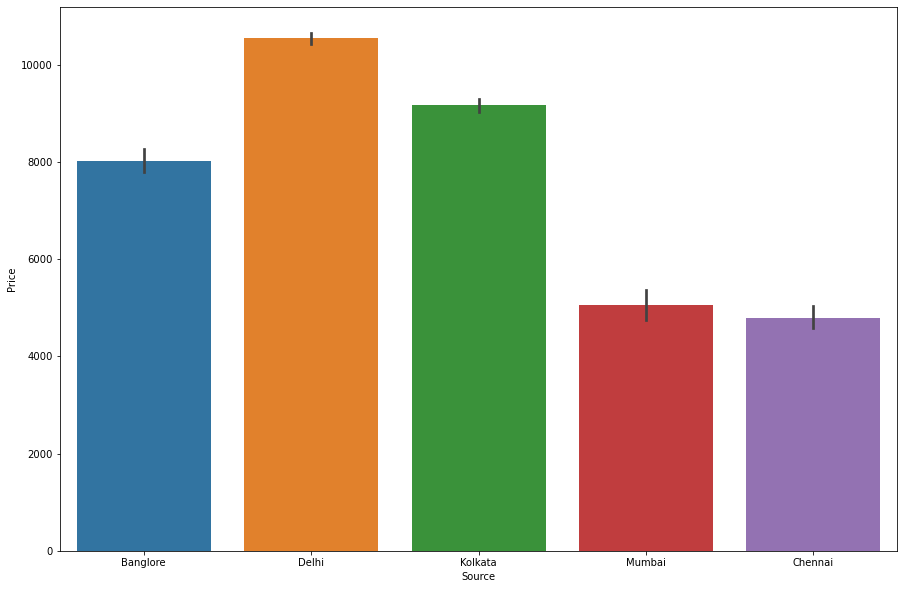

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

<br>

## Destination vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

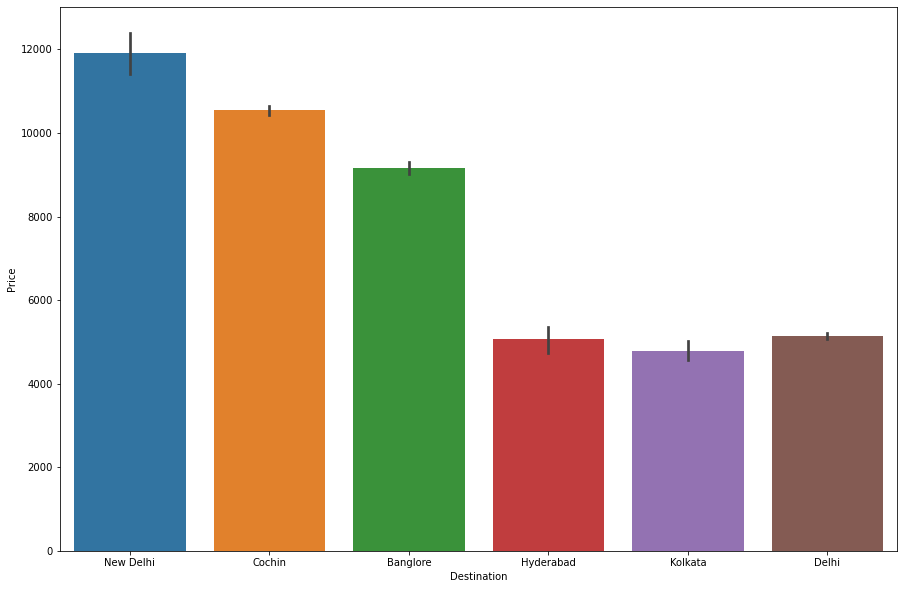

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [38]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [40]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

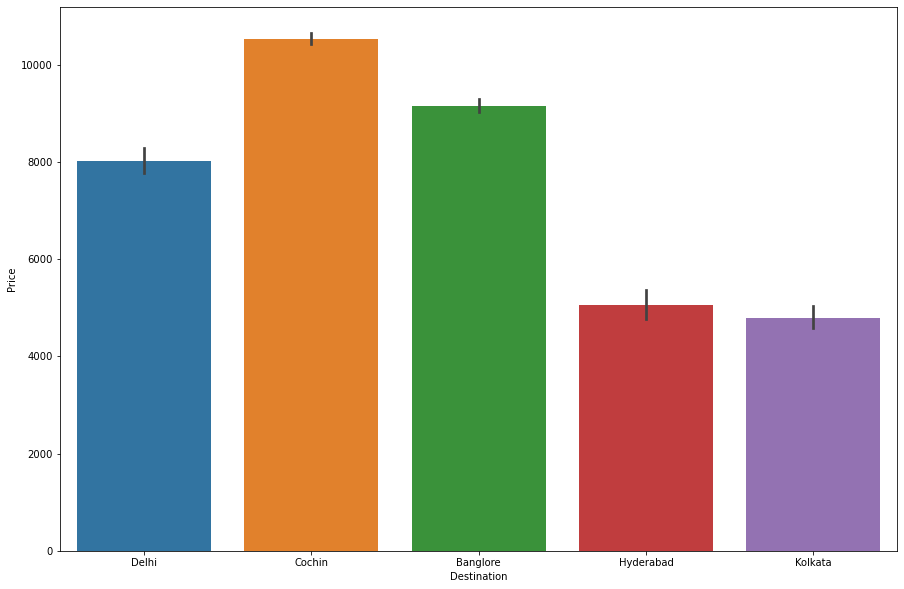

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [42]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

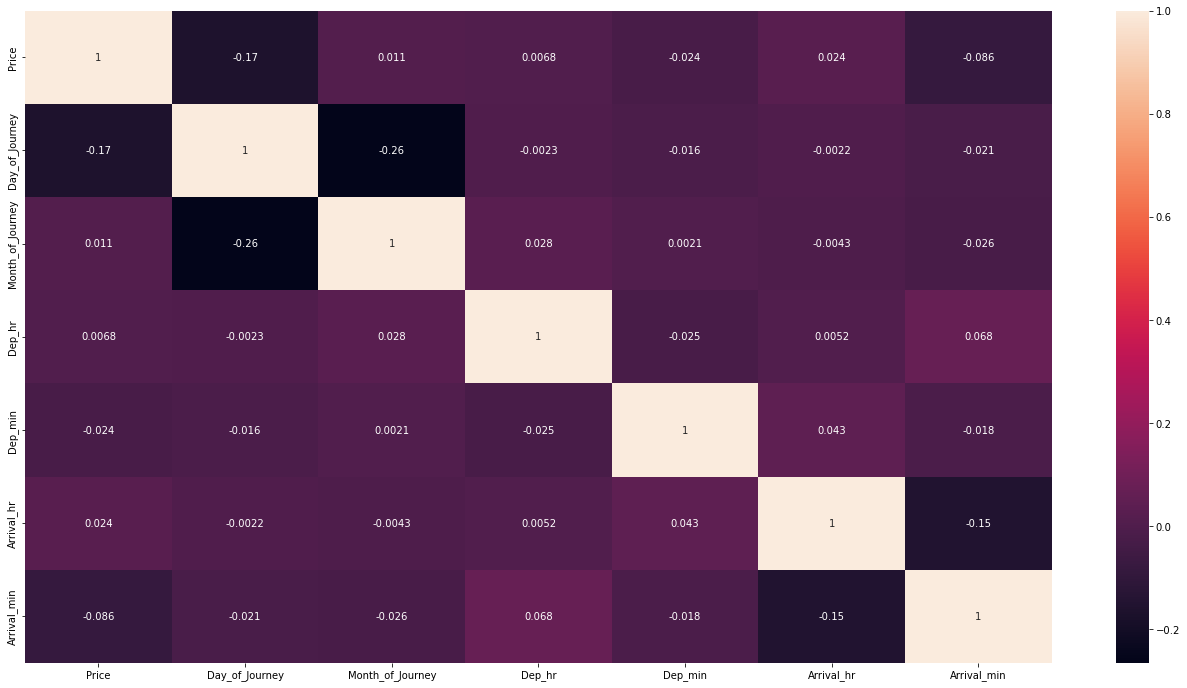

In [47]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

The features are less correlated which is a good thing for us to avoid **Multicollinearity**

<br>
<br>

## Handling categoriacal data

## Apply Onehot Encoding on the categorical variables

In [48]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [49]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [52]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [53]:
df.shape

(10682, 29)

<br>
<br>
<br>
<br>

In [54]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [55]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


<br>
<br>

## **Model Building and Hyperparameter Tuning**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## LinearRegression

In [73]:
#using various regression algorithms to predict
#multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
r2_score(y_test,y_predict)

0.5614841730715205

## RandomForestRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7929006586535656

### ExtraTreesRegressor

In [75]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7792137924681419

<br>

**Hyperparameter Tuning**

In [98]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 30)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [107]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 128, 177, 226, 275,
                                                         324, 373, 422, 471,
                                                         520, 569, 618, 667,
                                                         716, 765, 814, 863,
                                                         912, 961, 1010, 1059,
                                                         1108, 1157, 1206, 1255,
                                                         1304, 1353, 1402, 1451,
          

In [108]:
rCV.best_params_

{'n_estimators': 1157,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 35}

In [109]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12417.98789042,  6171.23128301,  3576.87696904, ...,
       10702.53422504, 11366.97723141,  3935.23777826])

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1232.6777078633045
MSE 4745982.401878073


In [111]:
r2_score(y_test,rf_pred)

0.7977263346388447

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



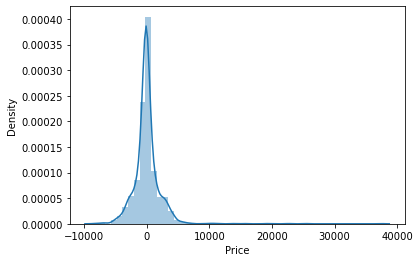

In [112]:
sns.distplot(y_test-rf_pred)
plt.show()

## CatBoostRegressor

In [84]:
!pip install catboost

In [113]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4385.5496102	total: 2.1ms	remaining: 2.1s
1:	learn: 4235.4416171	total: 3.99ms	remaining: 1.99s
2:	learn: 4086.9479093	total: 6.45ms	remaining: 2.14s
3:	learn: 3950.7096011	total: 8.85ms	remaining: 2.2s
4:	learn: 3826.7592421	total: 11.5ms	remaining: 2.29s
5:	learn: 3707.2381049	total: 13.5ms	remaining: 2.24s
6:	learn: 3596.1367528	total: 16.4ms	remaining: 2.33s
7:	learn: 3494.0020403	total: 18.8ms	remaining: 2.33s
8:	learn: 3407.0971246	total: 21.4ms	remaining: 2.35s
9:	learn: 3320.0029472	total: 24.1ms	remaining: 2.39s
10:	learn: 3243.3822864	total: 26.6ms	remaining: 2.39s
11:	learn: 3170.6682123	total: 28.7ms	remaining: 2.36s
12:	learn: 3103.8278973	total: 31.2ms	remaining: 2.37s
13:	learn: 3041.1797626	total: 34.1ms	remaining: 2.4s
14:	learn: 2982.4846469	total: 36.1ms	remaining: 2.37s
15:	learn: 2938.1733268	total: 38.4ms	remaining: 2.36s
16:	learn: 2888.7374337	total: 40.9ms	remaining: 2.37s
17:	learn: 2847.3725567	total: 43.2ms	remaining: 

In [89]:
cat_pred=cat.predict(X_test)

In [114]:
r2_score(y_test,cat_pred)

0.8088757382528134

## lightgbm

In [91]:
!pip install lightgbm

In [92]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [93]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [94]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.7712344707469444

## xgboost

In [115]:
!pip install xgboost

In [116]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.7887622345174642

In [210]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [219]:
# #Use pickle to save our model so that we can use it later

# import pickle 
# # Saving model to disk
# pickle.dump(CAT_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [117]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [124]:
df.to_csv('deploy_df.csv')